<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/05/PTE_DL5_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 5. gyakorlat: konvolúciós hálózat
### 2022. október 5.

forrás: https://github.com/mrdbourke/tensorflow-deep-learning

In [ ]:
!rm -r *

# download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# for colab
# !unzip -q pizza_steak.zip

# remove extra data
!rm -r __MACOSX
!rm -r pizza_steak.zip
!rm -r pizza_steak/.DS_Store
!rm -r pizza_steak/train/.DS_Store
!rm -r pizza_steak/test/.DS_Store

--2022-10-05 08:03:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   211MB/s    in 0.5s    

2022-10-05 08:03:14 (211 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]

rm: cannot remove '__MACOSX': No such file or directory
rm: cannot remove 'pizza_steak/.DS_Store': No such file or directory
rm: cannot remove 'pizza_steak/train/.DS_Store': No such file or directory
rm: cannot remove 'pizza_steak/test/.DS_Store': No such file or directory


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

Az adatokat tartalmazó könyvtárak és azok tartalma

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),dirpath))

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


#Feladat
Készítsen listát az összes fájlról egy file_path listába

In [ ]:
files_path = []


In [ ]:
files_path[900:905]

['pizza_steak/train/pizza/920595.jpg',
 'pizza_steak/train/pizza/1552253.jpg',
 'pizza_steak/train/pizza/816577.jpg',
 'pizza_steak/train/pizza/387697.jpg',
 'pizza_steak/train/pizza/951953.jpg']

##Egy könyvtárban található fájlok megszámlálása

In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

#Feladat
készítsünk egy pizza_train_files nevű listát amely a tréning adatokból az összes pizza mappában lévő fájlnevet tartalmazza

In [ ]:
pizza_train_files =  # mi történik ha csak 'pizza_steak/train' mappát adjuk meg?
pizza_train_files

['pizza', 'steak']

In [ ]:
data_dir = pathlib.Path("pizza_steak/train/pizza")


##Az osztályozási feladathoz tartozó osztálynevek

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_nmaes from the subdirectories
print(class_names)

['pizza' 'steak']


##Egy kép megjelenítése

In [ ]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'l view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1) # egy lista lesz a kimenet de most csak 1 képpel

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  
  return img

Image shape: (512, 512, 3)


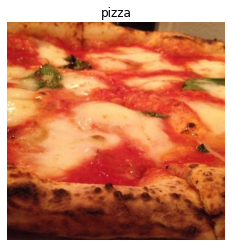

In [ ]:
# View a random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# View the image shape
img.shape # return width,height,color channels

(512, 510, 3)

#Fealdat
készítsen a fentiek alapján egy olyan függvényt ami paraméterként átveszi a könyvtár nevét és abban található képekből véletlenszerűen kiválaszt 25 db-ot majd ábrázolja azokat 5x5 plotban 

In [ ]:
random_image = random.sample(os.listdir('pizza_steak/train/pizza'),25) # egy lista lesz a kimenet de most csak 1 képpel

def view_random_images(target_dir, target_class):
  plt.figure(figsize=(15,15))
  for i in range(25):


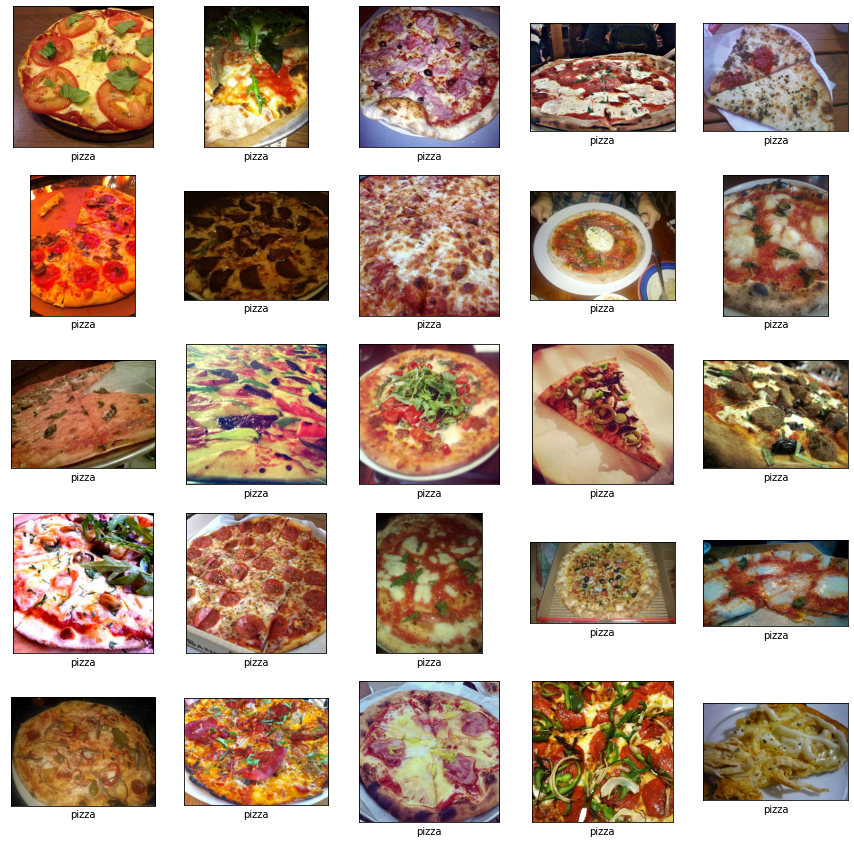

In [ ]:
view_random_images('pizza_steak/train/pizza', 'pizza')

#Adatok normálása

Sok gépi tanulási modell, beleértve a neurális hálózatokat is, a 0 és 1 közötti értékeket részesíti előnyben. Ennek ismeretében a képekkel való munka egyik leggyakoribb előfeldolgozási lépése a pixelértékek skálázása (más néven normalizálása) a képtáblák 255-tel való osztásával. (mivel 255 a maximális pixelérték).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.05882353, 0.07843137, 0.0627451 ],
        [0.05882353, 0.07843137, 0.0627451 ],
        [0.05882353, 0.07843137, 0.0627451 ],
        ...,
        [0.41176471, 0.50980392, 0.59607843],
        [0.40392157, 0.50196078, 0.58823529],
        [0.40392157, 0.49019608, 0.57254902]],

       [[0.05490196, 0.0745098 , 0.05882353],
        [0.05490196, 0.0745098 , 0.05882353],
        [0.05490196, 0.0745098 , 0.05882353],
        ...,
        [0.40784314, 0.50588235, 0.59215686],
        [0.41176471, 0.49803922, 0.58823529],
        [0.4       , 0.48627451, 0.56862745]],

       [[0.05490196, 0.0745098 , 0.05882353],
        [0.05490196, 0.0745098 , 0.05882353],
        [0.05490196, 0.0745098 , 0.05882353],
        ...,
        [0.41176471, 0.50980392, 0.59607843],
        [0.41176471, 0.49803922, 0.58039216],
        [0.4       , 0.48627451, 0.56862745]],

       ...,

       [[0.06666667, 0.0745098 , 0.05490196],
        [0.05882353, 0.06666667, 0.04705882],
        [0.05098039, 0

#Építsünk egy konvolúciós neurális hálózatot
módszer:

1. Töltsük be a képeinket
2. A képek előfeldolgozása
3. Egy CNN modell építése, hogy mintákat találjon a képeinken.
4. modellünk összeállítása
5. A modell illesztése a képzési adatainkhoz

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 & 1, also called as scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile or CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='adam', # tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 106s 2s/step - loss: 0.5861 - accuracy: 0.6747 - val_loss: 0.4541 - val_accuracy: 0.7760
Epoch 2/5
 3/47 [>.............................] - ETA: 1:26 - loss: 0.4666 - accuracy: 0.7604

KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
model_1.save('model_1.h5')

#Osztályozó építése teljesen összekötött rétegek felhasználásával

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 0.7072 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 4)                 602116    
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


#Feladat építsünk modellt az előzőek szerint 3 rejtett réteggel, rétegenként 100 neuronnal

In [ ]:
tf.random.set_seed(42)

# create model (same as above but let's improve it)
model_3 = tf.keras.Sequential([
    





# Compile model
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit model
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 212ms/step - loss: 3.3776 - accuracy: 0.6493 - val_loss: 0.7363 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 1.0759 - accuracy: 0.6787 - val_loss: 1.1522 - val_accuracy: 0.6940
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.7398 - accuracy: 0.7393 - val_loss: 1.0051 - val_accuracy: 0.5700
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6424 - accuracy: 0.7500 - val_loss: 0.5351 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5957 - accuracy: 0.7700 - val_loss: 0.8680 - val_accuracy: 0.6740


In [ ]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 100)               15052900  
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


#Modellkészítés folyamata:
1. Vizsgáljuk az adatokat (vizualizálás, vizualizálás, vizualizálás)
2. Adatok előfeldolgozása (előkészítettük a modellünk számára, a fő lépés itt a méretezés/normalizálás és az adataink kötegekké alakítása volt).
3. Készítsünk egy modellt (kezdjük egy alapvonallal)
4. Modell illesztése
5. A modell kiértékelése
6. A különböző paraméterek beállítása és a modell javítása (próbáljuk meg legyőzni az alapvonalunkat)



# 1. Adatok vizsgálata
Bármilyen adatokkal is van dolga, érdemes legalább 10-100 mintát vizualizálni, hogy elkezdje felépíteni saját mentális modelljét az adatokról.

Esetünkben észrevehetjük, hogy a steak-képek általában sötétebb színűek, míg a pizza-képek inkább egy határozott kör alakú középen. Ezek olyan minták lehetnek, amelyeket a neurális hálózatunk felismer.

Azt is észreveheti, ha az adatai közül néhányat elrontott (például rossz címke van rajta), és elkezdheti fontolgatni, hogyan javíthatná ki.

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


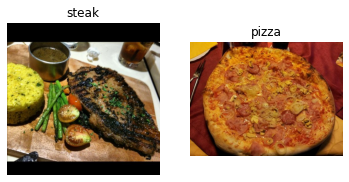

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

#2. Az adatok előfeldolgozása (előkészítése a modellhez)
A gépi tanulási projekt egyik legfontosabb lépése a gyakorló- és tesztkészlet létrehozása.

Esetünkben az adataink már fel vannak osztva képzési és tesztkészletekre. Egy másik lehetőség itt az lehet, hogy létrehozunk egy validációs készletet is, de ezt most hagyjuk.

Egy képosztályozási projekt esetében az a szokásos, hogy az adatokat tréning és teszt könyvtárakra osztjuk, és mindegyikben almappákat hozunk létre az egyes osztályok számára.

Kezdetben definiáljuk a képzési és tesztkönyvtárak elérési útvonalait.

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

A következő lépésünk az lesz, hogy az adatainkat kötegekké alakítjuk.

A tétel az adathalmaz egy kis részhalmaza, amelyet a modell a képzés során megvizsgál. Például ahelyett, hogy egyszerre 10 000 képet vizsgálnánk meg, és próbálnánk kitalálni a mintákat, a modell egyszerre csak 32 képet nézhet meg.

Ezt több okból is fontos:

A 10 000 kép (vagy annál több) nem biztos, hogy elfér a processzor (GPU) memóriájában.
Ha 10 000 kép mintáit próbálnánk egy csapásra megtanulni, az azt eredményezhetné, hogy a modell nem tudna nagyon jól tanulni.
Miért 32?

[A 32-es kötegméret jót tesz az egészségének.](https://twitter.com/ylecun/status/989610208497360896?s=20)

:-), sokféle kötegméretet használhat, de a 32-es méret nagyon hatékonynak bizonyult sokféle felhasználási esetben, és gyakran alapértelmezett sok adatelőfeldolgozási funkció esetében.

Ahhoz, hogy adatainkat kötegekké alakítsuk, először létrehozzuk az ImageDataGenerator egy-egy példányát minden egyes adathalmazunkhoz.

In [ ]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

Az ImageDataGenerator osztály segít a képek kötegekbe rendezésében, valamint a modellbe való betöltésük közbeni transzformációk elvégzésében.

Talán észrevetted a rescale paramétert. Ez egy példa az általunk végzett transzformációkra.

Emlékszel, hogy korábban importáltunk egy képet, amelynek pixelértékei 0 és 255 között voltak?

A rescale paraméter az 1/255-tel együtt olyan, mintha azt mondanánk, hogy "osszuk el az összes pixelértéket 255-tel". Ez azt eredményezi, hogy az összes képet importáljuk, és a pixelértékeiket normalizáljuk (0 és 1 közé alakítjuk).

🔑 Megjegyzés: További transzformációs lehetőségekért, például az adatok növeléséért (ezt később látjuk), olvassa el az ImageDataGenerator dokumentációját.

Most, hogy már van néhány ImageDataGenerator példányunk, a flow_from_directory metódus segítségével betölthetjük a képeinket a megfelelő könyvtárakból.

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Csodálatos! Úgy tűnik, hogy a képzési adathalmazunk 1500 képet tartalmaz, amelyek 2 osztályba tartoznak (pizza és steak), és a tesztadathalmazunk 500 képet tartalmaz, amelyek szintén 2 osztályba tartoznak.

Néhány dolog:

A könyvtárak felépítése miatt az osztályokat a train_dir és a test_dir alkönyvtárak nevei alapján következtetjük ki.
A target_size paraméter meghatározza a képeink bemeneti méretét (magasság, szélesség) formátumban.
A class_mode 'binary' értéke határozza meg az osztályozási problémánk típusát. Ha kettőnél több osztályunk lenne, akkor a 'categorical' értéket használnánk.
A batch_size határozza meg, hogy hány kép lesz az egyes tételekben, mi 32-t használtunk, ami megegyezik az alapértelmezett értékkel.
A train_data objektum vizsgálatával megnézhetjük a kötegelt képeinket és a címkéket.

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first image
images[0], images[0].shape

(array([[[0.13333334, 0.12156864, 0.16470589],
         [0.13333334, 0.12156864, 0.16470589],
         [0.12156864, 0.12156864, 0.16078432],
         ...,
         [0.48235297, 0.5254902 , 0.6117647 ],
         [0.227451  , 0.25882354, 0.34117648],
         [0.20392159, 0.22352943, 0.30980393]],
 
        [[0.12941177, 0.11764707, 0.16078432],
         [0.14117648, 0.12941177, 0.17254902],
         [0.14117648, 0.13333334, 0.1764706 ],
         ...,
         [0.12941177, 0.19215688, 0.28235295],
         [0.14509805, 0.19215688, 0.28627452],
         [0.17254902, 0.21568629, 0.3019608 ]],
 
        [[0.13333334, 0.10980393, 0.15686275],
         [0.12941177, 0.11764707, 0.16078432],
         [0.12941177, 0.12156864, 0.16470589],
         ...,
         [0.18431373, 0.2509804 , 0.3529412 ],
         [0.13725491, 0.19215688, 0.29411766],
         [0.16078432, 0.20784315, 0.30980393]],
 
        ...,
 
        [[0.627451  , 0.73333335, 0.8470589 ],
         [0.6392157 , 0.7568628 , 0.86666

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

#3. Hozzon létre egy modellt (kezdje egy alapvonallal).
Talán elgondolkodott azon, hogy milyen legyen az alapértelmezett modellarchitektúra.

És az igazság az, hogy erre a kérdésre sokféle válasz lehetséges.

Egy egyszerű heurisztika a számítógépes látásmodellekhez az, hogy azt a modellarchitektúrát használjuk, amelyik a legjobban teljesít az ImageNet-en (a különböző számítógépes látásmodellek összehasonlítására szolgáló, változatos képek nagy gyűjteménye).

Kezdetben azonban jó, ha egy kisebb modellt építünk, hogy megszerezzünk egy alaperedményt, amelyet megpróbálunk javítani.

🔑 Megjegyzés: A mélytanulásban a kisebb modell gyakran olyan modellt jelent, amely kevesebb réteggel rendelkezik, mint a technika jelenlegi állása (SOTA). Például egy kisebb modell 3-4 réteggel rendelkezhet, míg a legmodernebb modell, például a ResNet50 50+ réteggel rendelkezik.

Esetünkben vegyük a CNN explainer weboldalán található modell egy kisebb változatát (a fenti model_1-et), és építsünk egy 3 rétegű konvolúciós neurális hálózatot.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Nagyszerű! Készen áll egy egyszerű konvolúciós neurális hálózati architektúra.

És a tipikus CNN struktúrát követi:

Conv + ReLU rétegek (nemlinearitások) -> Összevonó réteg -> Teljesen összekapcsolt (sűrű réteg) kimenetként.
Beszéljünk a Conv2D réteg néhány komponenséről:

A "2D" azt jelenti, hogy a bemeneteink kétdimenziósak (magasság és szélesség), annak ellenére, hogy 3 színcsatornával rendelkeznek, a konvolúciókat minden csatornán egyenként futtatjuk.
Szűrők - ezek a "feature extractorok" száma, amelyek a képeinken fognak mozogni.
kernel_size - a szűrőink mérete, például egy (3, 3) (vagy csak 3) kernel_size azt jelenti, hogy minden szűrő 3x3 méretű lesz, ami azt jelenti, hogy minden alkalommal egy 3x3 pixeles teret fog vizsgálni. Minél kisebb a kernel, annál több finomabb jellemzőt fog kinyerni.
stride - a képpontok száma, amelyeken a szűrő áthalad a kép lefedése során. Az 1 stride azt jelenti, hogy a szűrő minden egyes pixelen 1-szer 1-et mozog. 2 stride azt jelenti, hogy egyszerre 2 pixelt mozog.
padding - ez lehet 'same' vagy 'valid', az 'same' nullákat ad a kép külső oldalához, így a konvolúciós réteg kimenete megegyezik a bemenettel, míg a 'valid' (alapértelmezett) levágja a felesleges pixeleket, ahol a szűrő nem fér el (pl. 224 pixel széles osztva a 3 kernelmérettel (224/3 = 74.6) azt jelenti, hogy egyetlen pixel lesz levágva a végén.

Mi az a "feature"?

Feature-nek tekinthető a kép bármely jelentős része. A mi esetünkben például egy feature lehet a pizza kör alakja. Vagy egy steak külső durva szélei.

Fontos megjegyezni, hogy ezeket a jellemzőket nem mi határozzuk meg, hanem a modell tanulja meg őket, miközben különböző szűrőket alkalmaz a képen.

📖 Források: Ha nagyszerű bemutatót szeretnél látni ezekről működés közben, mindenképpen tölts egy kis időt az alábbiak átnézésével:

[CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - nagyszerű vizuális áttekintés számos olyan koncepcióról, amelyet itt kóddal reprodukálunk.

Most, hogy a modellünk készen áll, fordítsuk le.




In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

Mivel bináris osztályozási problémán dolgozunk (pizza vs. steak), a veszteségfüggvény, amit használunk, a 'binary_crossentropy', ha többosztályos lenne, akkor valami olyasmit használnánk, mint a 'categorical_crossentropy'.

Adam az összes alapértelmezett beállítással az optimalizátorunk, az értékelési mérőszámunk pedig a pontosság.

#4. Modell illesztése
A modellünk összeállt, ideje illeszteni.

Itt két új paramétert fogsz észrevenni:

A mi esetünkben azt akarjuk, hogy a modellünk az összes tételen végigmenjen, így ez megegyezik a train_data hosszával (1500 kép 32 tételben = 1500/32 = ~47 lépés).
validation_steps - ugyanaz, mint fent, kivéve a validation_data paramétert (500 tesztkép 32-es tételekben = 500/32 = ~16 lépés).

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 228ms/step - loss: 1.1159 - accuracy: 0.6520 - val_loss: 0.4759 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4637 - accuracy: 0.7907 - val_loss: 0.4319 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3416 - accuracy: 0.8647 - val_loss: 0.3794 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.1714 - accuracy: 0.9480 - val_loss: 0.4220 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.0578 - accuracy: 0.9887 - val_loss: 0.4584 - val_accuracy: 0.8200


#5. A modell kiértékelése
Úgy tűnik, a modellünk tanul valamit.

Nézzük meg a képzési görbéit.

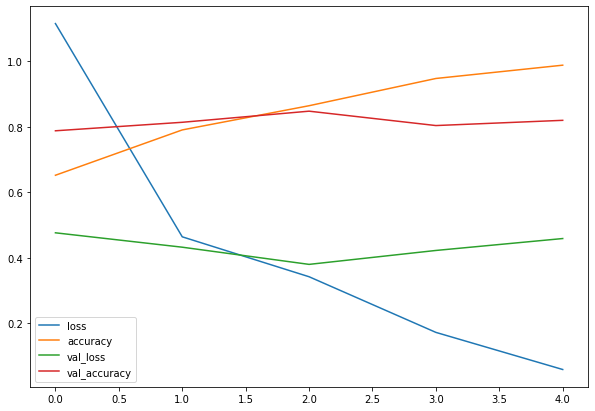

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Hmm, a veszteséggörbék alapján úgy tűnik, hogy a modellünk túlilleszkedik a képzési adathalmazhoz.

🔑 Megjegyzés: Ha egy modell validációs vesztesége növekedni kezd, akkor valószínű, hogy a modell túlilleszkedik a képzési adathalmazhoz. Ez azt jelenti, hogy a modell túl jól tanulja a képzési adathalmazban lévő mintákat, és így csökken az általánosítási képessége a nem látott adatokra.

A modellünk képzési teljesítményének további vizsgálatához válasszuk szét a pontossági és veszteséggörbéket.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

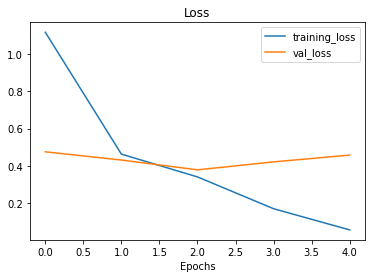

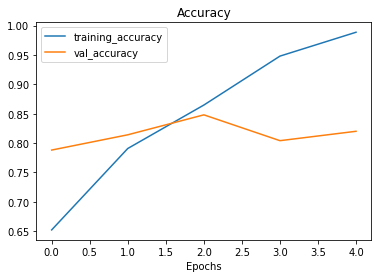

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_10 (Flatten)        (None, 475240)            0         
                                                                 
 dense_20 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#6. A modell paramétereinek beállítása
A gépi tanulási modell illesztése 3 lépésből áll:

Hozzon létre egy alapvonalat.
Az alapvonal felülmúlása egy nagyobb modell túlillesztésével.
Csökkentse a túlillesztést.
Eddig a 0. és az 1. lépésen mentünk keresztül.

És van még néhány dolog, amivel megpróbálhatjuk tovább túlilleszteni a modellünket:

Növelhetjük a konvolúciós rétegek számát.
Növeljük a konvolúciós szűrők számát.
Adjunk hozzá egy újabb sűrű réteget a lapított rétegünk kimenetéhez.
De mi ehelyett inkább arra fogunk koncentrálni, hogy a modellünk képzési görbéit jobban egymáshoz igazítsuk, más szóval a 2. lépést vesszük át.

Miért fontos a túlillesztés csökkentése?

Ha egy modell túl jól teljesít a képzési adatokon, és rosszul a nem látott adatokon, akkor nem sok hasznát vennénk, ha a való világban akarnánk használni.

Tegyük fel, hogy egy pizza vs. steak ételosztályozó alkalmazást készítünk, és a modellünk nagyon jól teljesít a képzési adatokon, de amikor a felhasználók kipróbálták, nem kaptak túl jó eredményeket a saját ételképeiken, vajon jó tapasztalat lenne ez?

Nem igazán...

Tehát a következő modellekhez, amiket építünk, számos paramétert fogunk beállítani, és menet közben megvizsgáljuk a képzési görbéket.

Nevezetesen, még 2 modellt fogunk építeni:

Egy ConvNet max poolinggal
Egy ConvNet max poolinggal és adatbővítéssel.
Az első modell esetében a módosított alapvető CNN-struktúrát követjük:

Conv rétegek + ReLU rétegek (nemlinearitások) + Max Pooling rétegek -> Fully connected (sűrű réteg) kimenetként.
Építsük fel. Ugyanazzal a szerkezettel fog rendelkezni, mint a model_4, de minden egyes konvolúciós réteg után egy MaxPool2D() réteggel.

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.6272 - accuracy: 0.6433 - val_loss: 0.5154 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4818 - accuracy: 0.7680 - val_loss: 0.3878 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4455 - accuracy: 0.8033 - val_loss: 0.4160 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4122 - accuracy: 0.8200 - val_loss: 0.3391 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3841 - accuracy: 0.8280 - val_loss: 0.3401 - val_accuracy: 0.8640


Oké, úgy tűnik, hogy a modellünk a max poolinggal (model_5) rosszabbul teljesít a képzési halmazon, de jobban a validációs halmazon.

Mielőtt megnézzük a képzési görbéit, nézzük meg az architektúráját.

In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 10)     

Észrevetted, hogy mi történik itt a kimeneti alakzattal minden egyes MaxPooling2D rétegben?

Minden alkalommal megfeleződik. Ez gyakorlatilag azt jelenti, hogy a MaxPooling2D réteg veszi az egyes Conv2D rétegek kimeneteit, és azt mondja: "Csak a legfontosabb jellemzőket akarom, a többitől szabadulj meg".

Minél nagyobb a pool_size paraméter, annál jobban fogja a max pooling réteg kiszorítani a képből a jellemzőket. Ha azonban túl nagy, a modell nem biztos, hogy képes lesz bármit is megtanulni.

Ennek a poolingnak az eredménye az összes betanítható paraméter jelentős csökkenésében mutatkozik meg (8 861 a model_5 modellben és 477 431 a model_4 modellben).

Ideje megnézni a veszteséggörbéket.

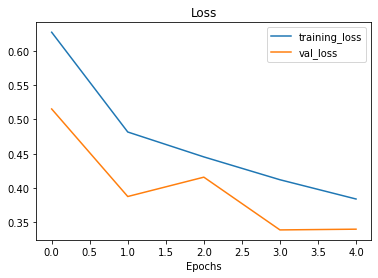

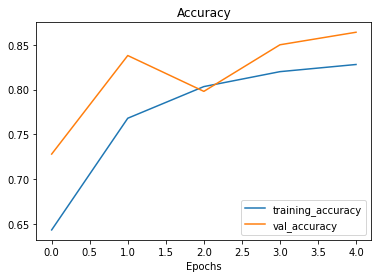

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

#Adatbővítés
Szép! Láthatjuk, hogy a képzési görbék sokkal közelebb kerülnek egymáshoz. A validációs veszteség azonban úgy tűnik, hogy a vége felé elkezd növekedni, ami viszont potenciálisan túlillesztéshez vezethet.

Itt az ideje, hogy elővegyük a trükkök tárházát, és kipróbáljuk a túlillesztés megelőzésének egy másik módszerét, az adatbővítést.

Először megnézzük, hogyan történik a kóddal, majd megvitatjuk, hogy mit csinál.

Az adatnövelés megvalósításához újra kell állítanunk az ImageDataGenerator példányainkat.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # kép forgatása max 20 fokkal
                                             shear_range=0.2, # nyírás
                                             zoom_range=0.2, # nagyítás
                                             width_shift_range=0.2, # kép eltolása
                                             height_shift_range=0.2, # kép eltolása
                                             horizontal_flip=True) # vízszintes tengely menti tükrözés

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

🤔 Kérdés: Mi az az adatbővítés?

[adatbővítés tensorflow](https://www.tensorflow.org/tutorials/images/data_augmentation)

Az adatbővítés a képzési adataink megváltoztatásának folyamata, ami azt eredményezi, hogy azok változatosabbak lesznek, és ezáltal a modelljeink általánosíthatóbb mintákat tanulhatnak. A módosítás jelentheti egy kép elforgatásának beállítását, megfordítását, kivágását vagy valami hasonlót.

Ezzel szimuláljuk azt az adatfajtát, amelyre a modell a való világban felhasználható.

Ha egy pizza vs. steak alkalmazást készítünk, nem biztos, hogy a felhasználóink által készített összes kép hasonló beállítású, mint a képzési adataink. Az adatbővítés használata egy másik módot ad arra, hogy megakadályozzuk a túlillesztést, és ezáltal általánosíthatóbbá tegyük a modellünket.

🔑 Megjegyzés: Az adatbővítést általában csak a képzési adatokon végezzük. Az ImageDataGenerator beépített adatbővítési paramétereinek használatával a képeinket úgy hagyjuk, ahogyan azok a könyvtárakban vannak, de a modellbe való betöltéskor véletlenszerűen manipuláljuk őket.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

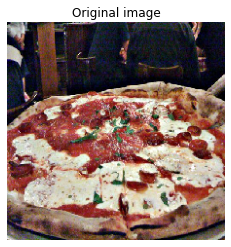

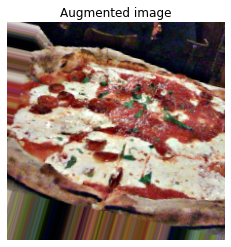

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Miután végigmentünk az eredeti és a kiterjesztett képek mintáján, láthatunk néhány példát a gyakorló képeken végzett átalakításokra.

Vegye észre, hogy a kiterjesztett képek némelyike az eredeti kép enyhén torzított változatának tűnik. Ez azt jelenti, hogy a modellünk kénytelen lesz megpróbálni mintákat tanulni a nem tökéletes képeken, ami gyakran előfordul, amikor valós képeket használunk.

#🤔 Kérdés: Használjak adatbővítést? És mennyire kell bővítenem?

Az adatbővítés egy módja annak, hogy megpróbáljuk megakadályozni a modell túlillesztését. Ha a modellje túlilleszkedik (pl. a validációs veszteség folyamatosan növekszik), akkor érdemes megpróbálkoznia az adatnövelés alkalmazásával.

Arra vonatkozóan, hogy mennyire kell az adatokat bővíteni, nincs meghatározott gyakorlat. A legjobb, ha megnézi az ImageDataGenerator osztály opcióit, és elgondolkodik azon, hogy az Ön felhasználási esetéhez tartozó modellnek milyen előnyös lehet némi adatnövelés.

Most, hogy megvan a kibővített adatunk, próbáljuk meg újrailleszteni rajta a modellt, és nézzük meg, hogyan befolyásolja a képzést.

Ugyanazt a modellt fogjuk használni, mint a model_5.

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6964 - accuracy: 0.5487 - val_loss: 0.6677 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 24s 522ms/step - loss: 0.6692 - accuracy: 0.6153 - val_loss: 0.6712 - val_accuracy: 0.5100
Epoch 3/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6818 - accuracy: 0.5933 - val_loss: 0.6134 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 25s 522ms/step - loss: 0.6225 - accuracy: 0.6660 - val_loss: 0.5582 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 25s 521ms/step - loss: 0.5844 - accuracy: 0.7107 - val_loss: 0.7808 - val_accuracy: 0.5540


# 🤔 Kérdés: Miért nem kapott a modellünk kezdetben nagyon jó eredményeket a gyakorlóhalmazon?

Azért, mert amikor létrehoztuk a train_data_augmented-t, kikapcsoltuk az adatok keverését a shuffle=False használatával, ami azt jelenti, hogy a modellünk egyszerre csak egy tételben lát egyfajta képet.

Például a pizza osztály kerül először betöltésre, mert ez az első osztály. Így a teljesítményt csak egyetlen osztályon mérjük, nem pedig mindkét osztályon. A validációs adatok teljesítménye folyamatosan javul, mert keveredett adatokat tartalmaz.

Mivel a shuffle=False értéket csak demonstrációs céllal állítottuk be (így ugyanazt a kiterjesztett és nem kiterjesztett képet ábrázolhattuk), ezt a jövőbeni adatgenerátoroknál a shuffle=True érték beállításával javíthatjuk.

Azt is észrevehettük, hogy az egyes epochák hosszabb ideig tartanak, amikor a kiterjesztett adatokkal edzünk, mint amikor nem kiterjesztett adatokkal (~25s per epocha vs. ~10s per epocha).

Ez azért van, mert az ImageDataGenerator példány a modellbe betöltéskor bővíti az adatokat. Ennek előnye, hogy az eredeti képeket változatlanul hagyja. Hátránya, hogy hosszabb ideig tart a betöltésük.


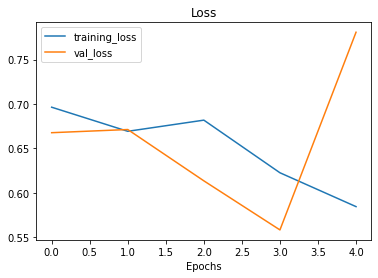

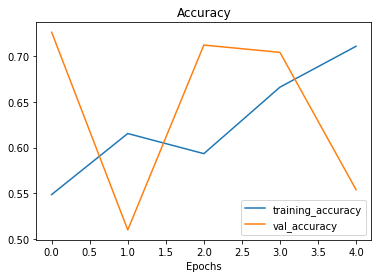

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

Úgy tűnik, hogy az érvényesítési veszteséggörbénk jó irányba halad, de egy kicsit ugrásszerű (a legideálisabb veszteséggörbe nem túl tüskés, hanem egyenletes ereszkedés, azonban a tökéletesen egyenletes veszteséggörbe a mesével egyenértékű).

Lássuk, mi történik, ha megkeverjük a kiegészített képzési adatokat.

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6480 - accuracy: 0.6100 - val_loss: 0.6156 - val_accuracy: 0.6400
Epoch 2/5
47/47 [==============================] - 25s 524ms/step - loss: 0.5841 - accuracy: 0.6953 - val_loss: 0.4734 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 25s 522ms/step - loss: 0.5202 - accuracy: 0.7533 - val_loss: 0.3974 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 25s 523ms/step - loss: 0.4886 - accuracy: 0.7700 - val_loss: 0.3560 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 25s 523ms/step - loss: 0.4816 - accuracy: 0.7760 - val_loss: 0.3575 - val_accuracy: 0.8400


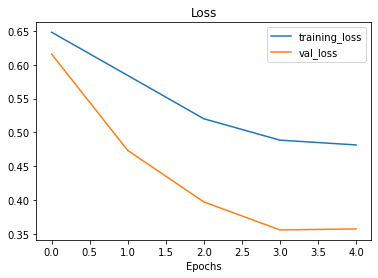

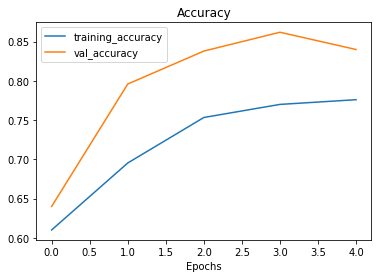

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

Figyeljük meg, hogy a model_7 modell esetében a teljesítmény a gyakorló adathalmazon szinte azonnal javul a model_6-hoz képest. Ez azért van, mert a flow_from_directory módszerben a shuffle=True paraméter használatával megkevertük a képzési adatokat, amikor átadtuk azokat a modellnek.

Ez azt jelenti, hogy a modell minden egyes kötegben láthatott példákat mind a pizza, mind a steak képekre, és viszont az alapján értékelhető, amit mindkét képből tanult, nem pedig csak az egyik fajtából.

A veszteséggörbéink is egy kicsit simábbnak tűnnek a kevert adatokkal (a history_6 és a history_7 összehasonlítása).

#Előrejelzés készítése a betanított modellel

Mit ér egy betanított modell, ha nem tudunk vele előrejelzéseket készíteni?

Hogy igazán kipróbálhassuk, feltöltünk néhány saját képet, és megnézzük, hogyan működik a modell.

Először is emlékeztessük magunkat az osztálynevekre, és nézzük meg a képet, amelyen tesztelni fogjuk.

--2022-10-04 18:41:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-10-04 18:41:30 (45.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



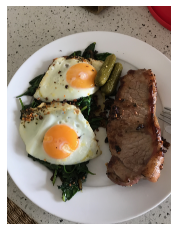

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Mivel a modellünk (224, 224, 3) alakú képeket vesz fel, át kell alakítanunk az egyéni képünket, hogy a modellünkkel használhassuk.

Ehhez a képünket a tf.io.read_file (fájlok beolvasásához) és a tf.image (képünk átméretezéséhez és tenzorrá alakításához) segítségével importálhatjuk és dekódolhatjuk.

🔑 Megjegyzés: Ahhoz, hogy a modellünk előrejelzéseket tudjon készíteni nem látott adatokra, például saját, egyéni képeinkre, az egyéni képnek ugyanolyan alakúnak kell lennie, mint amilyenre a modellünket betanítottuk. Általánosabban fogalmazva, ahhoz, hogy az egyéni adatokon előrejelzéseket tudjon készíteni, ugyanolyan alakúnak kell lennie, mint amilyenre a modelljét betanították.

#Készítsünk egy függvényt az adatok beolvasására és átalakítására

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3) #tensor formatum

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Make a prediction on our custom image (spoiler: this won't work)
model_7.predict(steak)

ValueError: ignored

Van még egy probléma...

Bár a képünk ugyanolyan alakú, mint azok a képek, amelyeken a modellünket betanították, még mindig hiányzik egy dimenzió.

Emlékszel, hogy a modellünket tételesen képeztük ki?

Nos, a tételek mérete lesz az első dimenzió.

Tehát a valóságban a modellünket a (batch_size, 224, 224, 224, 3) alakú adatokon képeztük ki.

Ezt úgy tudjuk kijavítani, hogy a tf.expand_dims segítségével hozzáadunk egy pluszt az egyéni képtenzorunkhoz.

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
#steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


In [ ]:
# Make a prediction on custom image tensor
pred = model_7.predict(steak)
pred

array([[0.9455637]], dtype=float32)

Ahh, a jóslatok előrejelzési valószínűség formájában jelennek meg. Más szóval ez azt jelenti, hogy a kép milyen valószínűséggel tartozik az egyik vagy a másik osztályba.

Mivel bináris osztályozási problémával dolgozunk, ha az előrejelzési valószínűség 0,5 fölött van, a modell szerint az előrejelzés nagy valószínűséggel a pozitív osztály (1. osztály).

Ha pedig az előrejelzési valószínűség 0,5 alatt van, akkor a modell szerint a megjósolt osztály nagy valószínűséggel a negatív osztály (0. osztály).

🔑 Megjegyzés: A 0,5-es határérték tetszés szerint módosítható. Például beállíthatja a határértéket úgy, hogy 0,8 és több legyen a pozitív osztály, és 0,2 a negatív osztály esetében. Ez azonban szinte mindig megváltoztatja a modell teljesítménymutatóit, ezért győződjön meg róla, hogy azok a megfelelő irányba változnak.

De pozitív és negatív osztályt mondani nem sok értelme van, amikor pizzával 🍕 és steakkel 🥩 dolgozunk...

Írjunk tehát egy kis függvényt, amely a predikciókat osztálynevükké alakítja, majd a célképet ábrázolja.

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
pred.shape

(1, 1)

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

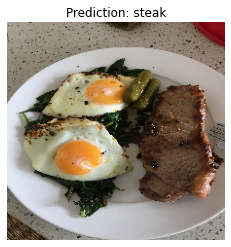

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names)

#Modellünk mentése és betöltése
Ha már betanítottál egy modellt, valószínűleg szeretnéd elmenteni és betölteni valahova máshova.

Ehhez használhatjuk a save és load_model függvényeket.

In [ ]:
# Save a model
model_7.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_7 = tf.keras.models.load_model("saved_trained_model")
loaded_model_7.evaluate(test_data)

16/16 [==============================] - 3s 153ms/step - loss: 0.3575 - accuracy: 0.8400


[0.3575063645839691, 0.8399999737739563]

#Házi feladat

Építsen képosztályozó modellt az alábbi adatkészlet felhasználásával! Alkalmazzon adatbővítést, kisérletezzen több modell létrehozásával!
Értékelje a modellt, majd mentse el azt!

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-04 18:42:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   111MB/s    in 4.4s    

2022-10-04 18:42:12 (111 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_nmaes from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
